In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

In [7]:
df = pd.read_csv(Path.cwd().parent.joinpath("data","df_40_final_v3.csv"))
df = df.drop(columns="Unnamed: 0")
df = df.reset_index()
df = df.drop(columns="index")
df.head()

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,latitude,longitude,Year,Country,Energy_type,CODE_x,continent,geometry
0,279.389,15182.60,0.150,0.155,0.0,104.341,5.670,-0.005,0.0,0.001,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,renewables_n_other,None,South America,NaN
1,279.389,15182.60,5.000,0.812,0.0,104.341,5.670,4.188,0.0,0.003,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,petroleum_n_other_liquids,None,South America,NaN
2,279.389,15182.60,0.616,0.616,0.0,104.341,5.670,0.000,0.0,0.002,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,natural_gas,None,South America,NaN
3,279.389,15182.60,0.001,0.002,0.0,104.341,5.670,-0.000,0.0,0.000,0.0,0.0,6.424,-66.59,1980-01-01,Venezuela,coal,None,South America,NaN
4,278.376,15597.88,0.156,0.161,0.0,110.257,6.178,-0.005,0.0,0.001,0.0,0.0,6.424,-66.59,1981-01-01,Venezuela,renewables_n_other,None,South America,NaN


In [8]:
# Estos datos los vamos a utilizar como introducción de lo más general a lo más específico para llegar después a Estados Unidos y China
continentes = df.groupby("continent").sum().sort_values(by="GDP",ascending=False)
continentes.head()

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,latitude,longitude
continent,,,,,,,,,,,,,,
Asia,4117806.060,5.463621e+08,7640.057,6388.737,425446.779,493093.245,18512.225,1251.301,1364526.518,162.193,0.766,56.372,70637.230000,187817.948000
North America,3167682.359,8.082688e+07,3951.932,4394.330,245235.312,157562.071,4424.227,-442.403,26213.303,0.905,0.000,1.519,23134.650000,-59897.070000
Europe,1736086.858,5.566062e+07,1501.194,1995.036,111250.942,229952.838,7611.951,-493.808,1743484.679,95.983,0.913,73.680,74433.299784,14473.553628
South America,681707.132,5.125642e+07,785.215,584.933,24671.763,45860.499,3137.370,200.271,108923.460,0.698,0.000,0.435,-8742.530000,-45546.470000
Africa,586790.113,5.948044e+07,1360.192,636.192,40683.714,68727.270,5191.325,723.996,460728.004,15.805,0.000,0.976,12141.808000,25767.360000


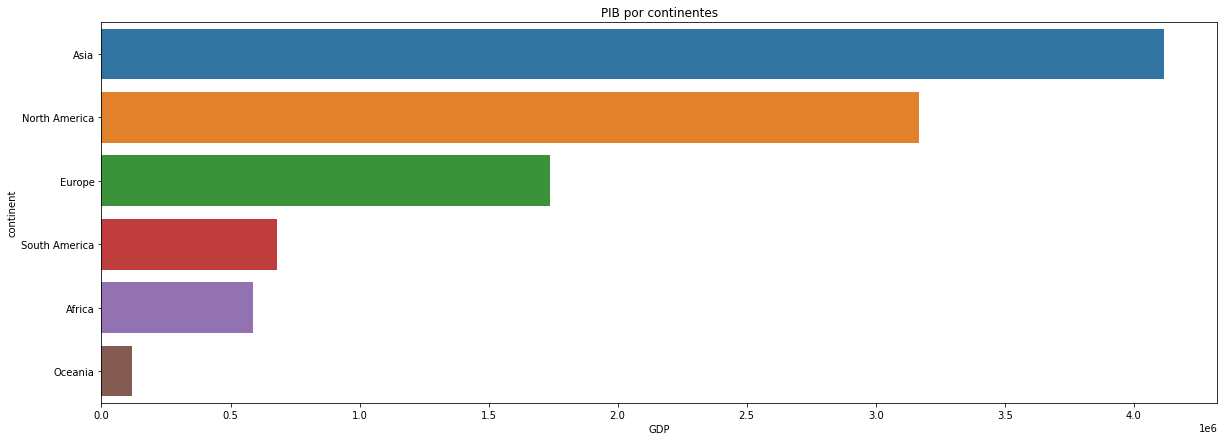

In [39]:
plt.figure(figsize=(20,7))
sns.barplot(data=continentes,y=continentes.index,x=continentes.GDP)
plt.title("PIB por continentes")
plt.show()

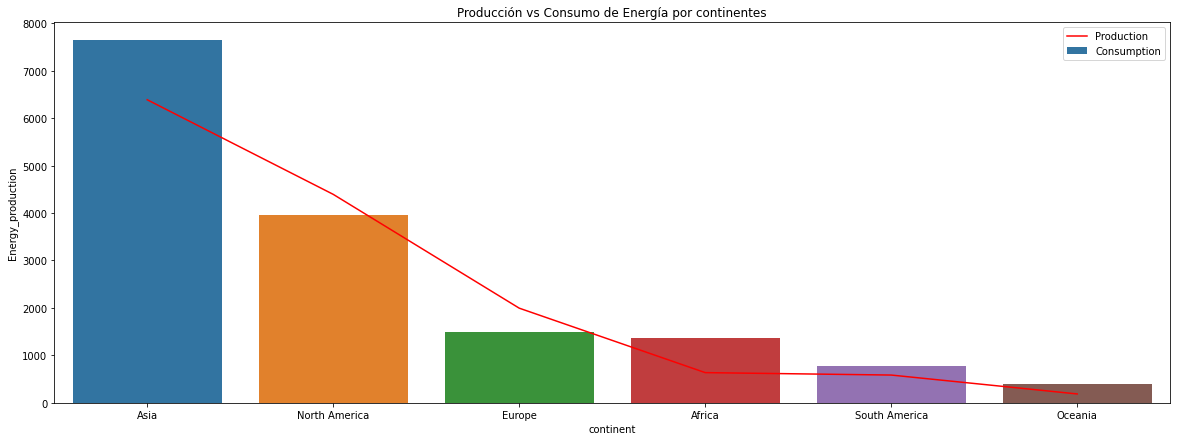

In [44]:
plt.figure(figsize=(20,7))

continentes2 = df.groupby("continent").sum().sort_values(by="Energy_production",ascending=False)
continentes3 = df.groupby("continent").sum().sort_values(by="Energy_consumption",ascending=False)

sns.lineplot(data=continentes3,x=continentes3.index,
            y="Energy_consumption",color="red",label="Production")
sns.barplot(data=continentes2,x=continentes2.index,
            y=continentes2.Energy_production,label="Consumption")
plt.title("Producción vs Consumo de Energía por continentes")
plt.legend()
plt.show()

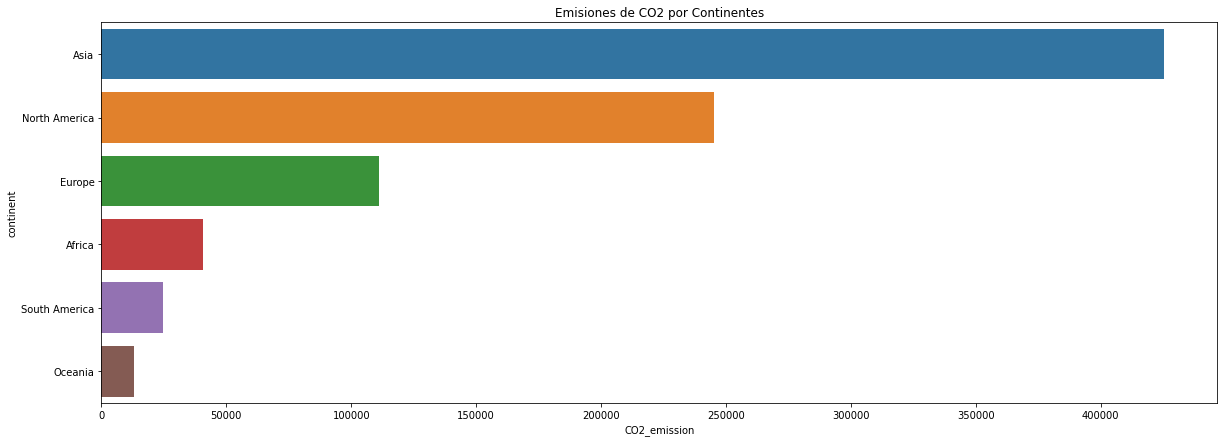

In [45]:
plt.figure(figsize=(20,7))

continentes4 = df.groupby("continent").sum().sort_values(by="CO2_emission",ascending=False)
continentes.head()
sns.barplot(data=continentes4,y=continentes4.index,x="CO2_emission")
plt.title("Emisiones de CO2 por Continentes")
plt.show()

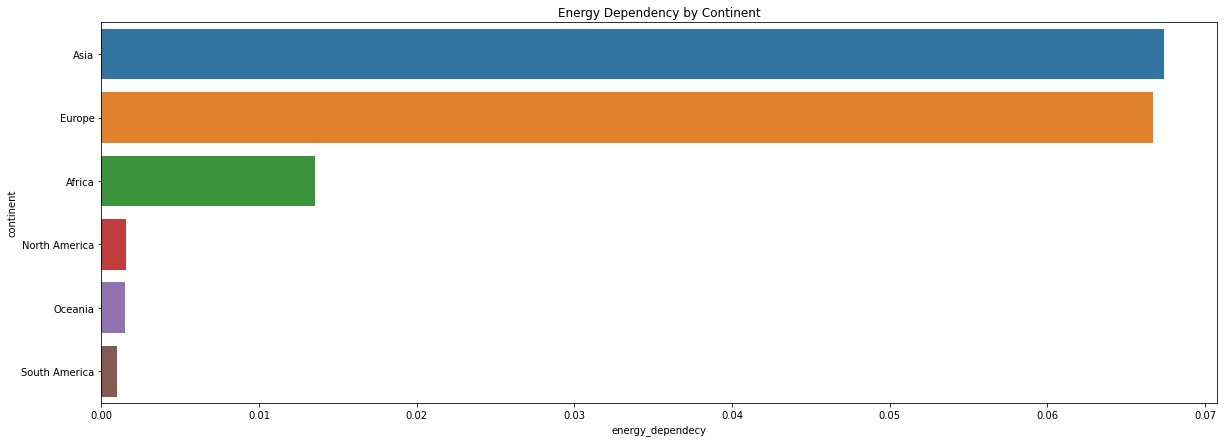

In [47]:
plt.figure(figsize=(20,7))

continentes5 = df.groupby("continent").mean().sort_values(by="energy_dependecy",ascending=False)
continentes.head()
sns.barplot(data=continentes5,y=continentes5.index,x="energy_dependecy")
plt.title("Energy Dependency by Continent")
plt.show()

In [13]:
df.describe()

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,latitude,longitude
count,6478.000000,6.478000e+03,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000
mean,1606.681771,1.229842e+05,2.412045,2.189825,132.777142,159.499531,6.165643,0.222219,572.841132,0.042579,0.000259,0.020629,25.866103,22.232066
std,2996.602615,2.726639e+05,5.784713,6.011814,482.177263,173.341516,4.691727,2.861878,5161.579595,0.624420,0.005237,0.389116,26.063346,64.152662
min,0.429000,5.017900e+01,0.000000,-0.163000,0.000000,0.000000,0.000000,-27.318000,0.000000,-0.006000,0.000000,0.000000,-38.416000,-106.347000
25%,216.174000,1.563190e+04,0.051000,0.078000,0.000000,41.973000,3.727000,-0.028750,0.000000,0.000000,0.000000,0.000000,9.082000,1.660000
50%,580.205000,3.678774e+04,0.525500,0.553000,9.725500,107.517500,5.006000,0.000000,15.663500,0.001000,0.000000,0.000000,29.312000,20.462222
75%,1684.366000,8.293416e+04,2.274500,1.794250,84.446250,211.198000,8.112000,0.255750,67.742000,0.002000,0.000000,0.003000,48.020000,55.923000
max,32289.041000,1.434512e+06,88.513000,96.119000,9113.558000,1139.321000,31.219000,20.781000,247029.391000,32.860000,0.266000,15.300000,61.524000,138.253000


In [14]:
df.median()

/var/folders/4d/pmkjmbcd4z51v2gnz9v6pv4h0000gn/T/ipykernel_3003/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


GDP                          580.205000
Population                 36787.740000
Energy_production              0.525500
Energy_consumption             0.553000
CO2_emission                   9.725500
per_capita_production        107.517500
Energy_intensity_by_GDP        5.006000
balance                        0.000000
eficiency                     15.663500
energy_dependecy               0.001000
use_intensity_pc               0.000000
co2_pc                         0.000000
latitude                      29.312000
longitude                     20.462222
dtype: float64

In [15]:
df.mode()

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,latitude,longitude,Year,Country,Energy_type,CODE_x,continent,geometry
0,2.456,96.328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.166,10.452,1992-01-01,Germany,coal,None,Asia,POLYGON ((14.119686313542559 53.75702912049104...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,natural_gas,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,petroleum_n_other_liquids,NaN,NaN,NaN


In [16]:
serie_rango = []
serie_minimo = []
serie_maximo = []
varianza = []
desv_tipica = []
columnas = df.select_dtypes(exclude="object").columns
for i in range(len(columnas)):
    maximo = df[columnas[i]].max()
    minimo = df[columnas[i]].min()
    rango = maximo - minimo
    var = np.var(df[columnas[i]])
    std_dev = np.std(df[columnas[i]])
    serie_rango.append(rango)
    serie_minimo.append(minimo)
    serie_maximo.append(maximo)
    varianza.append(var)
    desv_tipica.append(std_dev)

df_rango = pd.DataFrame(serie_rango,columnas)
df_rango = df_rango.rename(columns={0:"rango"})

df_minimo = pd.DataFrame(serie_minimo,columnas)
df_minimo = df_minimo.rename(columns={0:"min_val"})

df_maximo = pd.DataFrame(serie_maximo,columnas)
df_maximo = df_maximo.rename(columns={0:"max_val"})

df_var = pd.DataFrame(varianza,columnas)
df_var = df_var.rename(columns={0:"varianza"})

df_desv = pd.DataFrame(desv_tipica,columnas)
df_desv = df_desv.rename(columns={0:"desv_tipica"})

dispersion = pd.concat([df_rango,df_maximo,df_minimo,df_var,df_desv],axis=1)
dispersion




,rango,max_val,min_val,varianza,desv_tipica
GDP,32288.612,32289.041,0.429,8.978241e+06,2996.371315
Population,1434461.821,1434512.000,50.179,7.433414e+10,272642.871569
Energy_production,88.513,88.513,0.000,3.345774e+01,5.784267
Energy_consumption,96.282,96.119,-0.163,3.613633e+01,6.011350
CO2_emission,9113.558,9113.558,0.000,2.324590e+05,482.140045
per_capita_production,1139.321,1139.321,0.000,3.004264e+04,173.328136
Energy_intensity_by_GDP,31.219,31.219,0.000,2.200890e+01,4.691365
balance,48.099,20.781,-27.318,8.189082e+00,2.861657
eficiency,247029.391,247029.391,0.000,2.663779e+07,5161.181186
energy_dependecy,32.866,32.860,-0.006,3.898401e-01,0.624372


In [17]:
df.loc[df.GDP == df.GDP.min(),["Country","Year","GDP"]]

,Country,Year,GDP
2725,Saudi Arabia,1982-01-01,0.429
2726,Saudi Arabia,1982-01-01,0.429
2727,Saudi Arabia,1982-01-01,0.429
2728,Saudi Arabia,1982-01-01,0.429


In [18]:
df.loc[df.GDP == df.GDP.max(),["Country","Year","GDP"]]

,Country,Year,GDP
4001,Algeria,1985-01-01,32289.041


In [19]:
df.loc[df.Population == df.Population.min(),["Country","Year","Population"]]

,Country,Year,Population
595,Former Yugoslavia,1980-01-01,50.179


In [20]:
df.loc[df.Population == df.Population.max(),["Country","Year","Population"]]

,Country,Year,Population
3616,China,2019-01-01,1434512.0
3617,China,2019-01-01,1434512.0
3618,China,2019-01-01,1434512.0
3619,China,2019-01-01,1434512.0
3620,China,2019-01-01,1434512.0


In [21]:
df.loc[df.eficiency == df.eficiency.min(),"Year"].unique()

array(['1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
       '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
       '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
       '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
       '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
       '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
       '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
       '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
       '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
       '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01'],
      dtype=object)

In [22]:
df.loc[df.eficiency == df.eficiency.max(),["Country","Year","eficiency"]]

,Country,Year,eficiency
5986,France,2018-01-01,247029.391


In [23]:
df_china = df.loc[df.Country == "China",:]
df_china = df_china.reset_index()
df_china = df_china.drop(columns="index")
df_china = df_china.groupby("Year").sum()
df_china.head()

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,latitude,longitude
Year,,,,,,,,,,,,,,
1980-01-01,2738.484,4007680.0,19.539,19.107,0.000,76.284,111.636,0.432,0.000,0.028,0.0,0.000,143.448,416.78
1981-01-01,2878.148,4065768.0,19.358,18.964,1596.696,74.632,105.424,0.394,213.414,0.026,0.0,0.001,143.448,416.78
1982-01-01,3137.180,4122952.0,20.437,19.940,1587.191,77.376,101.692,0.498,207.411,0.026,0.0,0.001,143.448,416.78
1983-01-01,3476.000,4181408.0,21.857,21.286,1671.102,81.448,97.976,0.572,188.137,0.025,0.0,0.001,143.448,416.78
1984-01-01,4004.348,4243480.0,23.918,23.056,1785.801,86.928,92.120,0.863,188.552,0.024,0.0,0.001,143.448,416.78


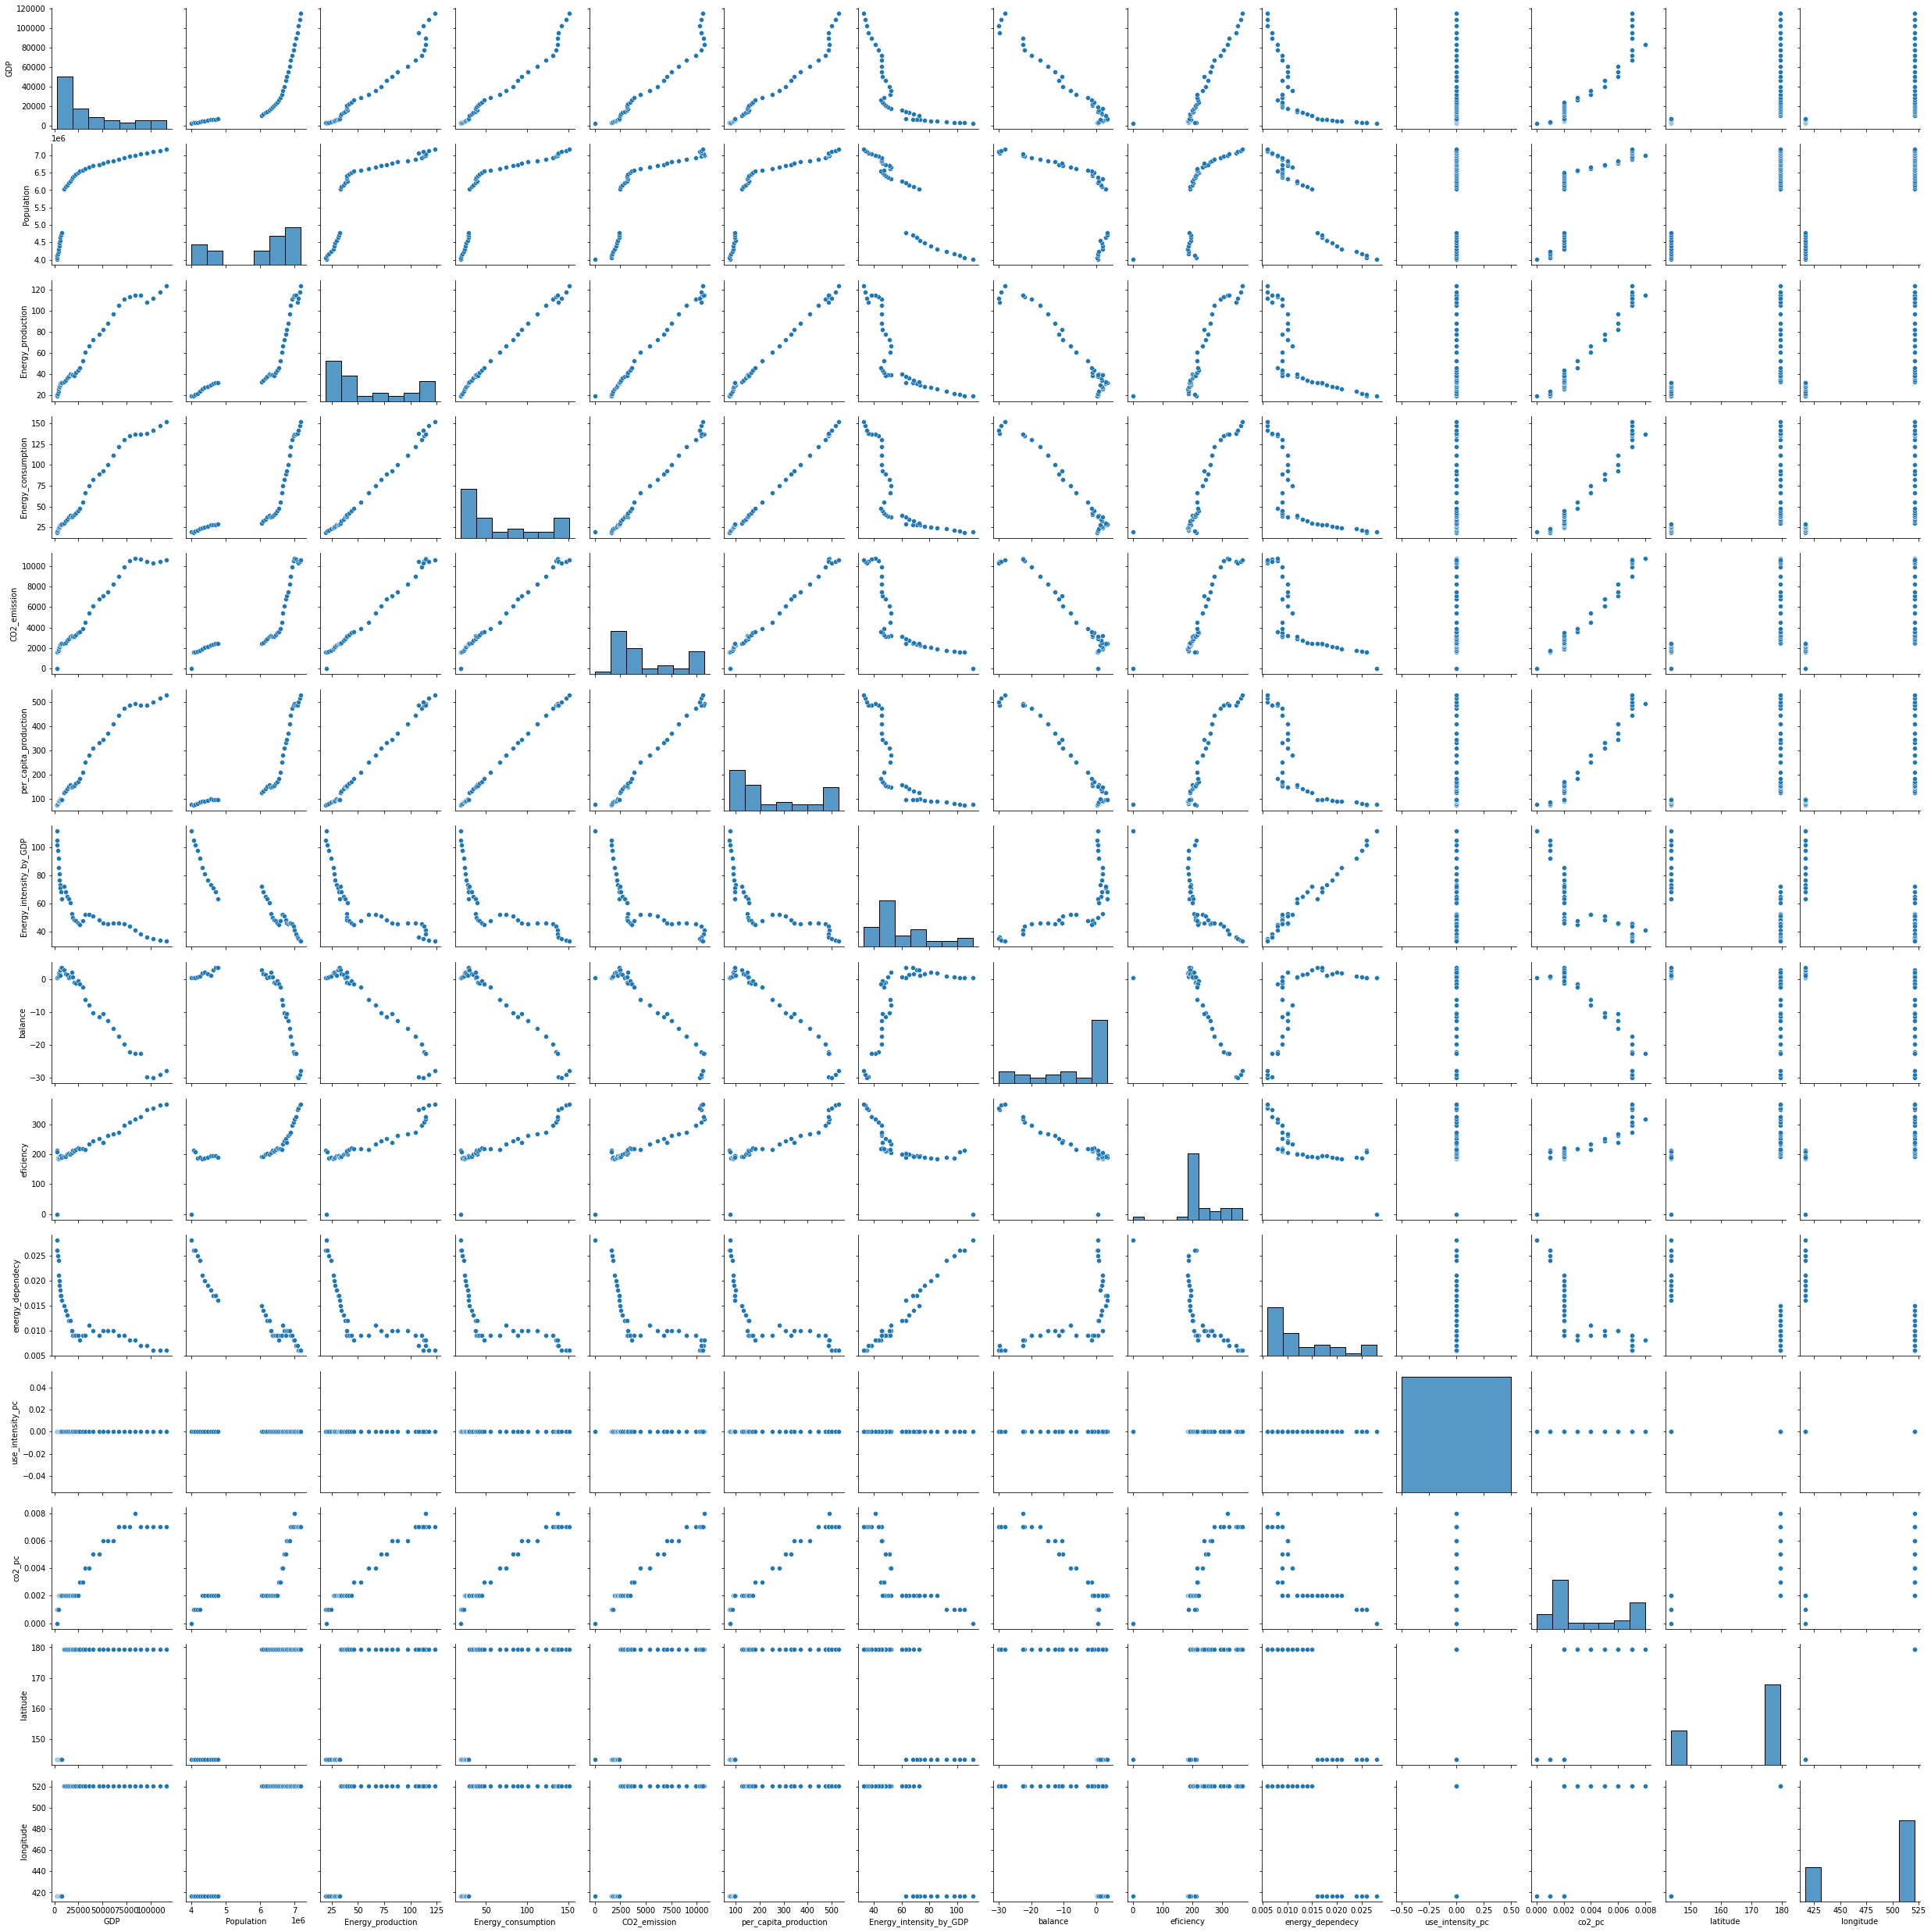

In [24]:
sns.pairplot(data=df_china)

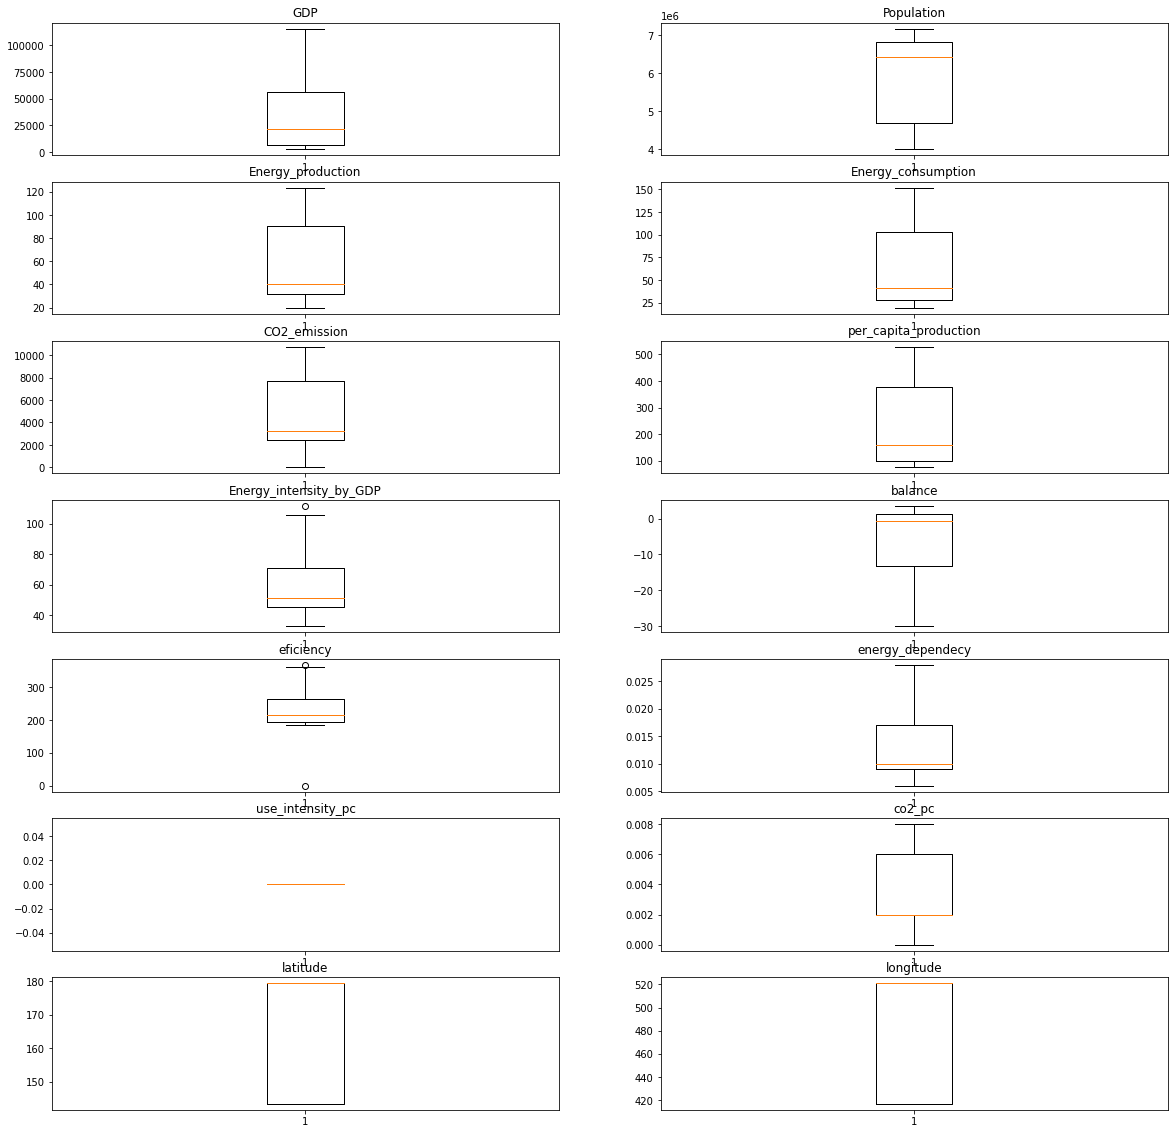

In [25]:
df_china_numeric = df_china.select_dtypes(exclude="object")
columnas_chinas = df_china_numeric.columns
fig = plt.figure(figsize=(20,20))
for i in range(len(columnas_chinas)):
    plt.subplot(7,2,i+1)
    plt.boxplot(df_china[columnas_chinas[i]])
    plt.title(columnas_chinas[i])
plt.show()

In [26]:
df_usa = df.loc[df.Country == "United States",:]
df_usa = df_usa.reset_index()
df_usa = df_usa.drop(columns="index")
df_usa = df_usa.groupby("Year").sum()
df_usa.head()

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,latitude,longitude
Year,,,,,,,,,,,,,,
1980-01-01,35403.75,1135595.0,67.147,77.984,4946.627,1717.625,55.095,-10.838,250.056,0.011,0.0,0.022,185.45,-478.565
1981-01-01,36302.25,1147081.0,66.910,75.968,4756.270,1657.625,52.380,-9.057,242.775,0.010,0.0,0.021,185.45,-478.565
1982-01-01,35647.80,1158042.5,66.527,72.987,4636.631,1576.930,51.230,-6.460,239.702,0.010,0.0,0.019,185.45,-478.565
1983-01-01,37281.90,1168655.0,64.067,72.846,4404.435,1559.815,48.895,-8.779,239.087,0.009,0.0,0.019,185.45,-478.565
1984-01-01,39979.80,1178924.0,68.800,76.492,4383.943,1623.740,47.880,-7.690,220.176,0.009,0.0,0.018,185.45,-478.565


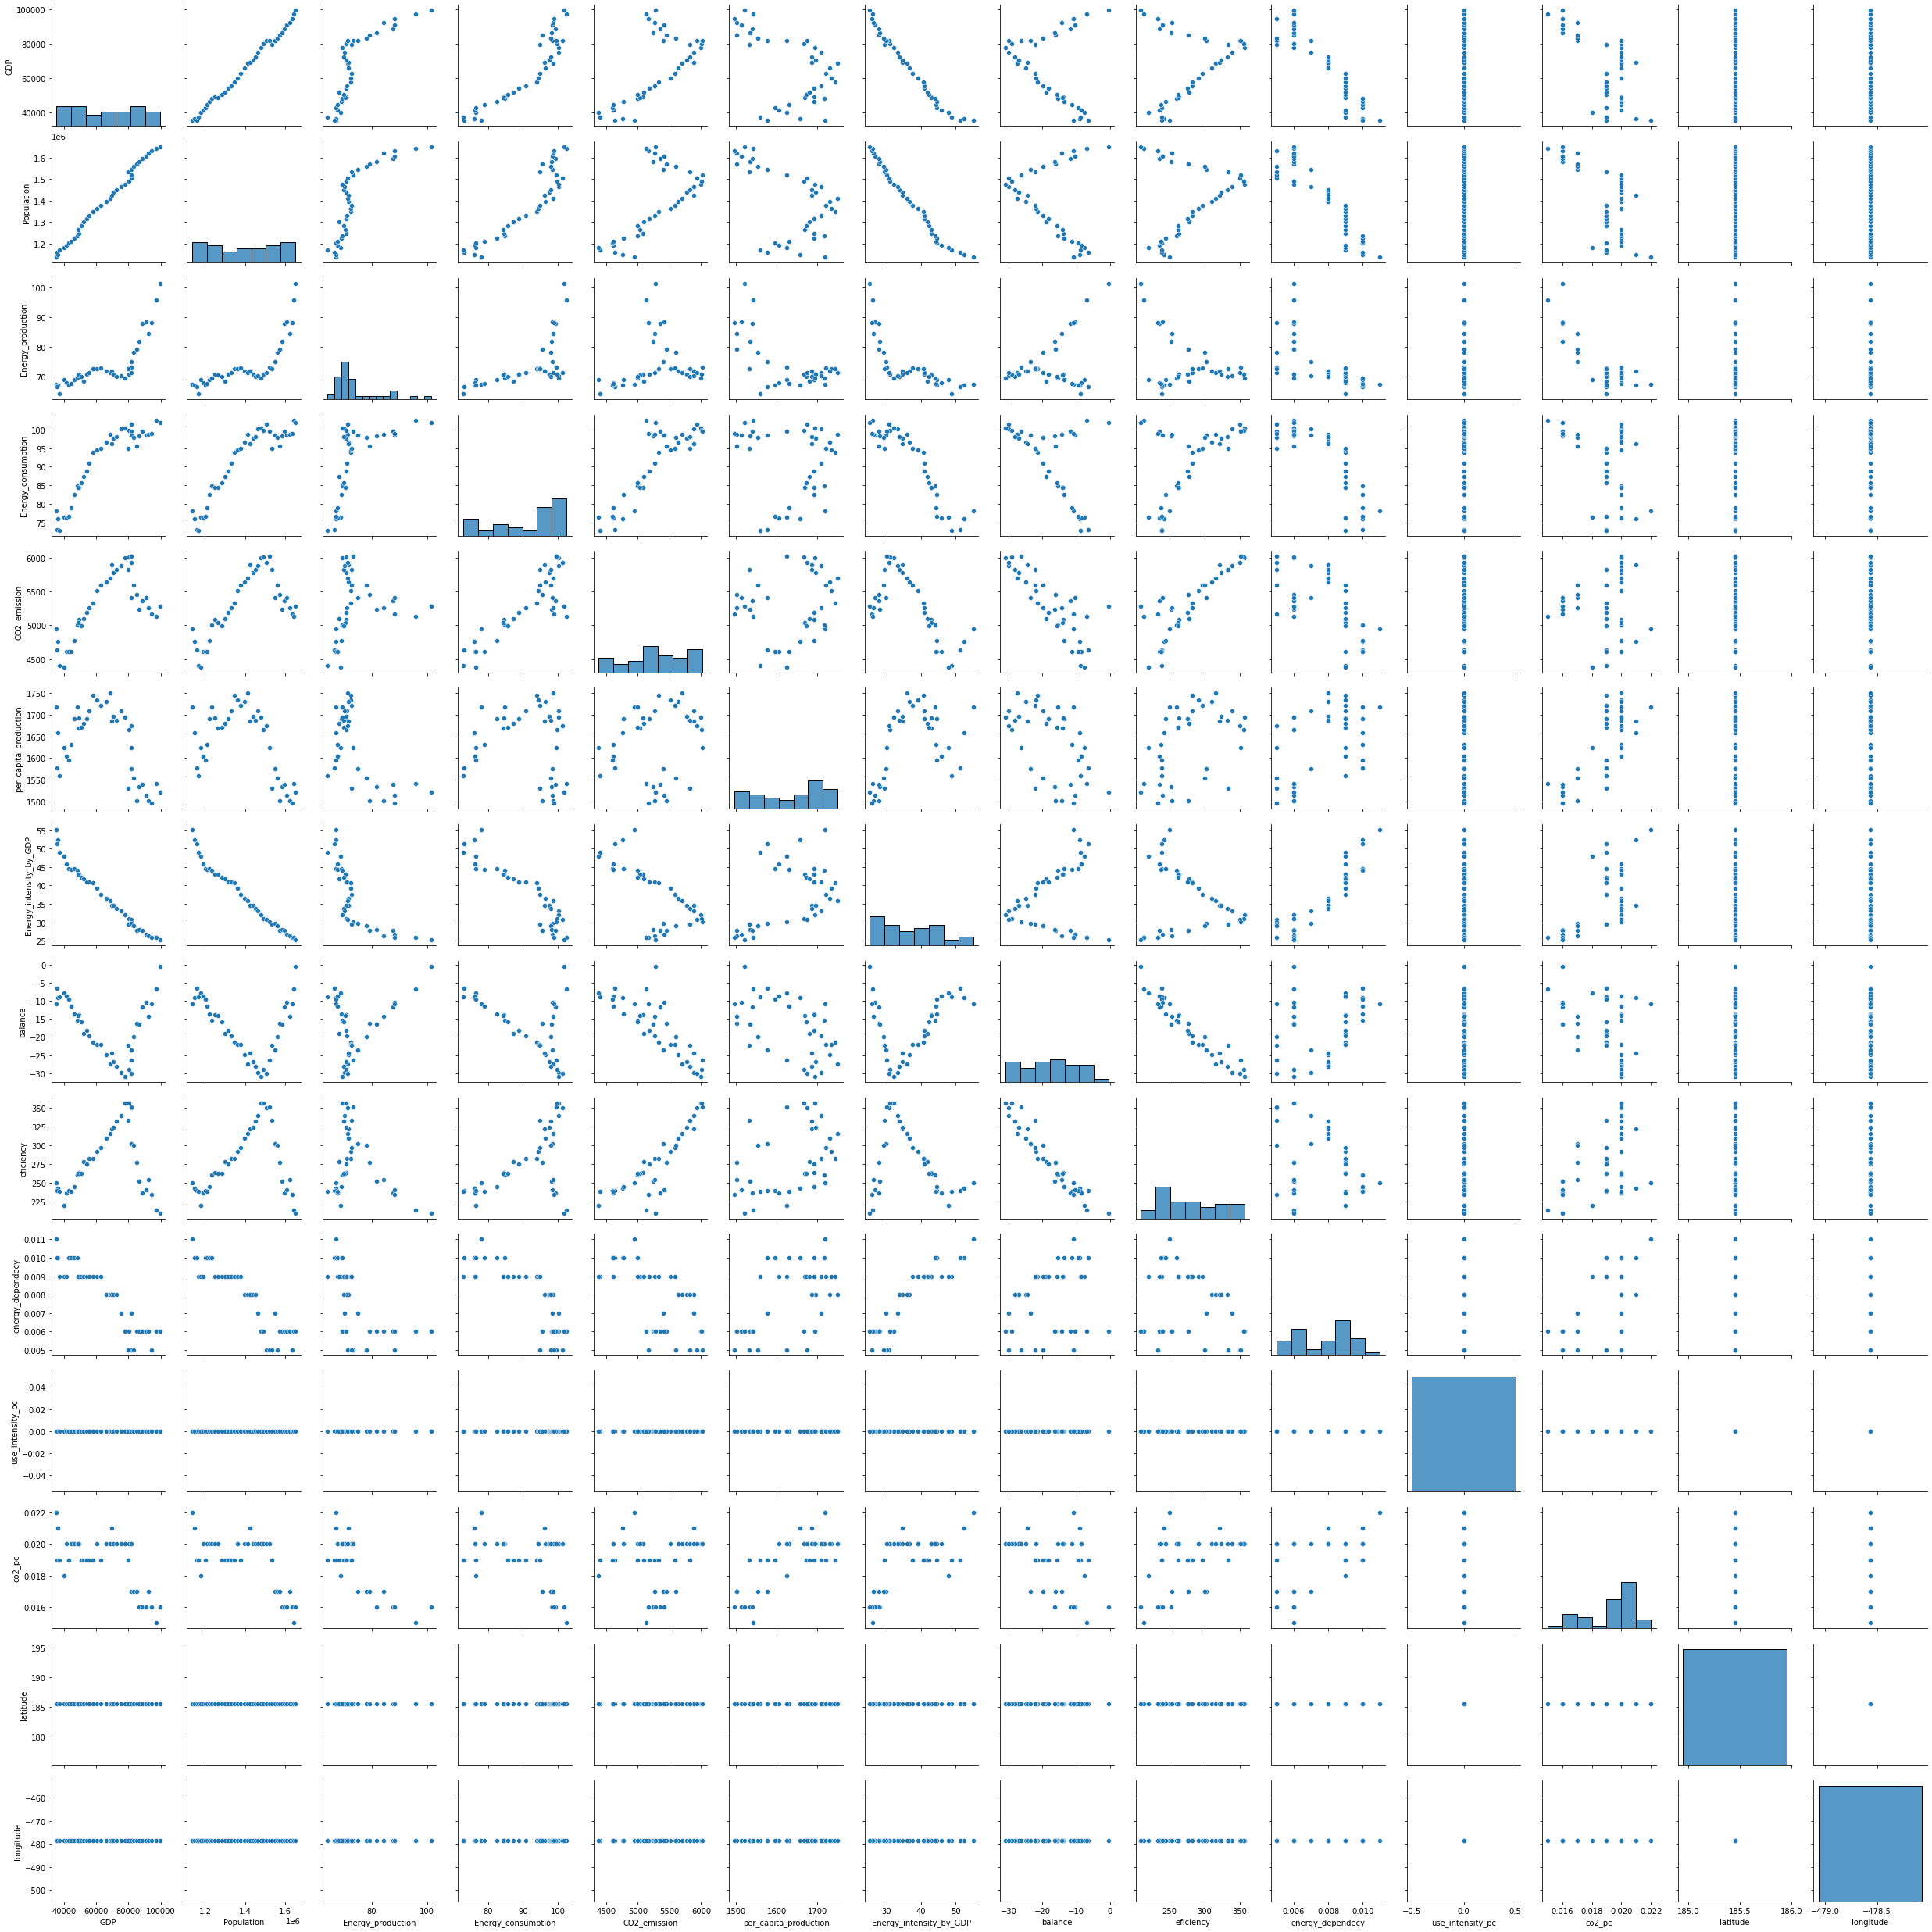

In [27]:
sns.pairplot(data=df_usa)

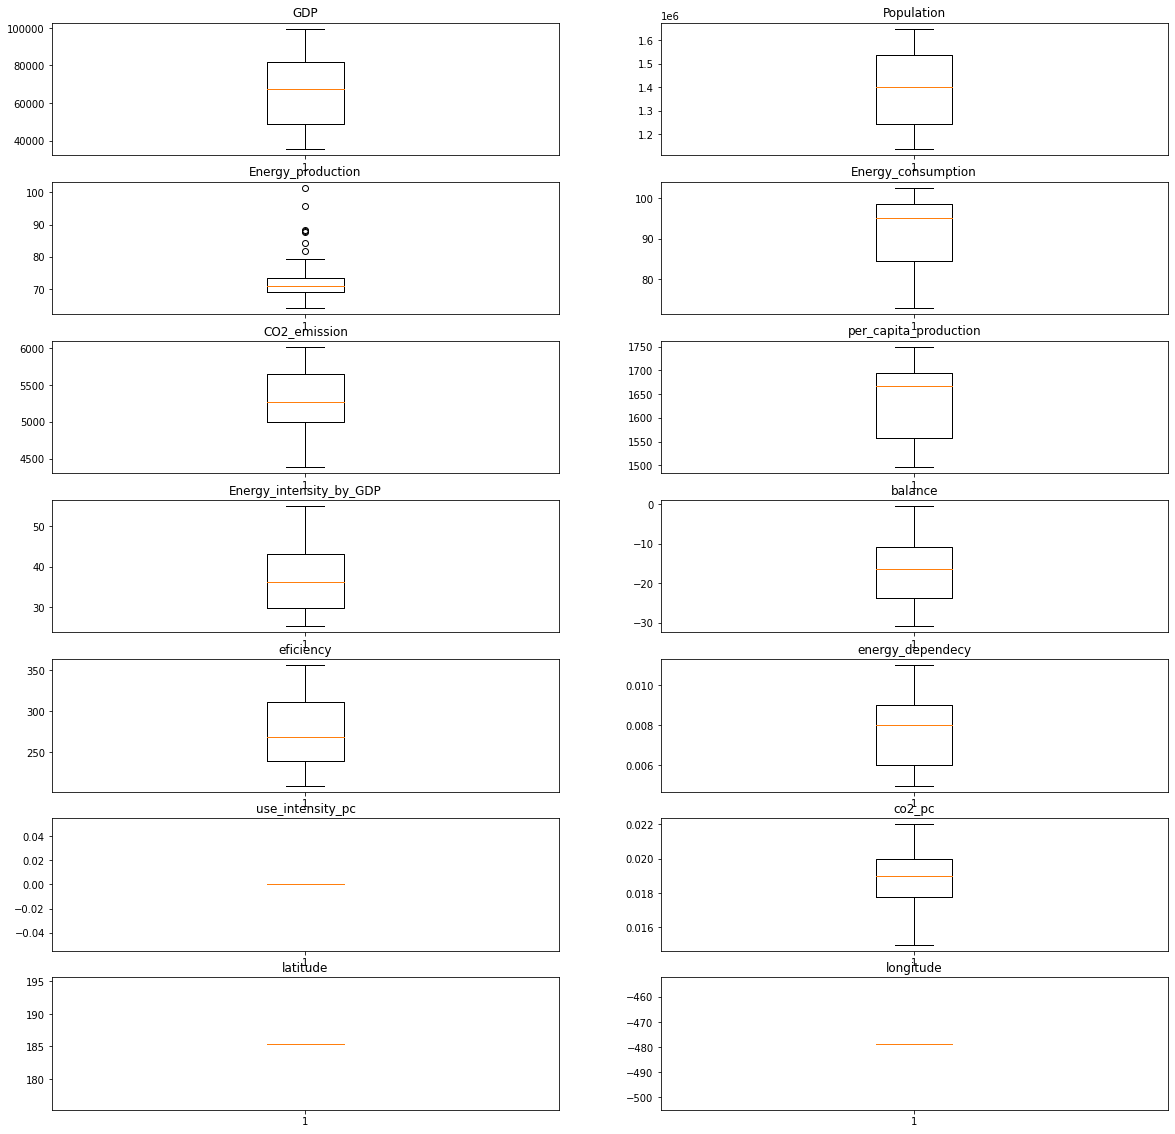

In [28]:
df_usa_numeric = df_usa.select_dtypes(exclude="object")
columnas_usa = df_usa_numeric.columns
fig = plt.figure(figsize=(20,20))
for i in range(len(columnas_usa)):
    plt.subplot(7,2,i+1)
    plt.boxplot(df_usa[columnas_usa[i]])
    plt.title(columnas_usa[i])
plt.show()

In [29]:
df_usa.Energy_production.nlargest(15)

Year
2019-01-01    101.401
2018-01-01     95.748
2015-01-01     88.281
2017-01-01     88.103
2014-01-01     87.749
2016-01-01     84.316
2013-01-01     81.861
2012-01-01     79.251
2011-01-01     78.106
2010-01-01     74.907
2008-01-01     73.145
1998-01-01     72.826
2009-01-01     72.591
1996-01-01     72.435
1997-01-01     72.421
Name: Energy_production, dtype: float64

In [30]:
df_Europa = df.loc[df.continent == "Europe",:]
df_energia_europa = df_Europa.groupby(by="Energy_type").sum()
df_energia_europa.head()

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,latitude,longitude
Energy_type,,,,,,,,,,,,,,
coal,347111.008,1.130717e+07,428.496,511.211,46812.396,49840.538,1625.309,-82.710,59047.036,50.189,0.698,61.015,15794.752068,3119.715170
natural_gas,349563.245,1.139203e+07,339.205,441.137,22698.009,49840.538,1625.309,-101.931,923294.855,10.945,0.047,3.224,15794.752068,3119.715170
nuclear,324847.524,9.943816e+06,247.845,247.845,0.000,30590.686,1110.715,0.000,0.000,5.766,0.028,0.000,11254.291512,1994.692948
petroleum_n_other_liquids,355911.494,1.146012e+07,352.543,674.756,41740.537,49840.538,1625.309,-322.204,761142.788,27.830,0.138,9.441,15794.752068,3119.715170
renewables_n_other,358653.587,1.155748e+07,133.105,120.087,0.000,49840.538,1625.309,13.037,0.000,1.253,0.002,0.000,15794.752068,3119.715170


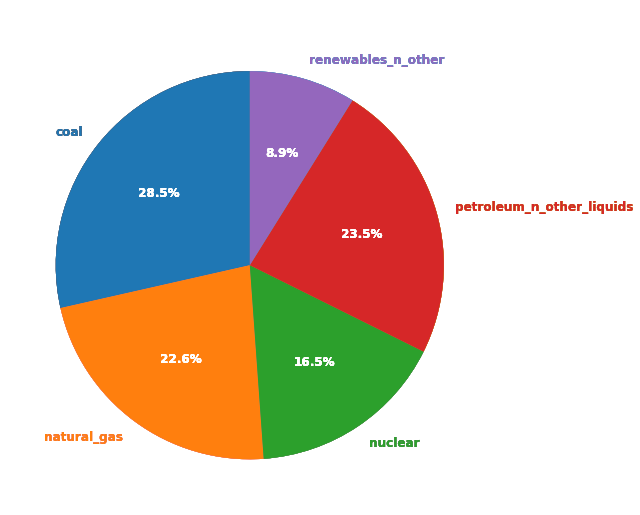

In [31]:
fig = plt.figure(figsize=(9,9))
for i in range(len(df_energia_europa)):

  patches, texts, pcts = plt.pie(df_energia_europa.Energy_production,labels=df_energia_europa.index,
          autopct='%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': None},
          textprops={'size': 'large'},startangle=90)
  plt.setp(pcts, color='white', fontweight='bold')
  plt.title("tipos de energía Europa",color="white")
  for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
  plt.setp(pcts, color='white')
  plt.setp(texts, fontweight=600)
  plt.tight_layout()

In [32]:
df_años = df.groupby(["Year","continent","Energy_type"])["Energy_production"].sum()
df_años.head()


Year        continent  Energy_type              
1980-01-01  Africa     coal                          2.553
                       natural_gas                   1.018
                       petroleum_n_other_liquids    15.813
                       renewables_n_other            0.206
            Asia       coal                         33.315
Name: Energy_production, dtype: float64

In [33]:
df_años_europa = df_años.loc[:,"Europe"]
df_años_europa

Year        Energy_type              
1980-01-01  coal                         18.687
            natural_gas                   6.692
            nuclear                       1.833
            petroleum_n_other_liquids     5.190
            renewables_n_other            2.247
                                          ...  
2019-01-01  coal                          3.745
            natural_gas                   7.823
            nuclear                       6.029
            petroleum_n_other_liquids     6.016
            renewables_n_other            6.484
Name: Energy_production, Length: 200, dtype: float64

In [34]:
len(df.Year.sort_values().unique())

40

In [35]:
df_años_europa[:,"coal"].index

Index(['1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
       '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01',
       '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
       '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
       '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
       '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
       '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
       '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01'],
      dtype='object', name='Year')

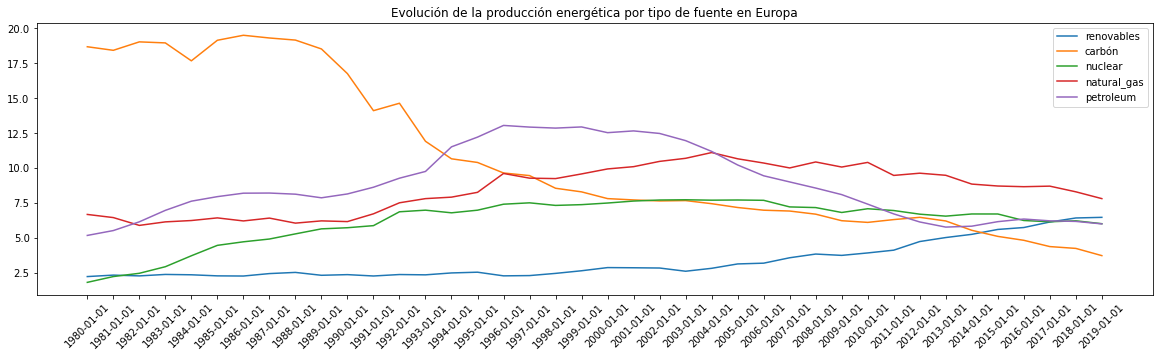

In [36]:

europa_r = df_años_europa[:,"renewables_n_other"]
europa_c = df_años_europa[:,"coal"]
europa_n = df_años_europa[:,"nuclear"]
europa_p = df_años_europa[:,"petroleum_n_other_liquids"]
europa_g = df_años_europa[:,"natural_gas"]
#europa_r = europa_r.reset_index() 
fig = plt.figure(figsize=(20,5))
plt.plot(europa_r.index,europa_r,label="renovables")
plt.plot(europa_c.index,europa_c,label="carbón")
plt.plot(europa_n.index,europa_n,label="nuclear")
plt.plot(europa_g.index,europa_g,label="natural_gas")
plt.plot(europa_p.index,europa_p,label="petroleum")
plt.legend()
plt.xticks(rotation=45)
plt.title("Evolución de la producción energética por tipo de fuente en Europa")
plt.show()

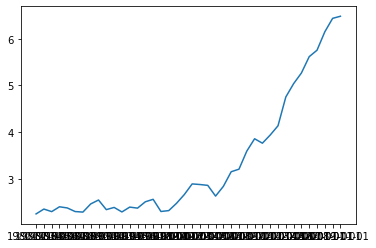

In [37]:
plt.plot(europa_r.index,europa_r,label="renovables")